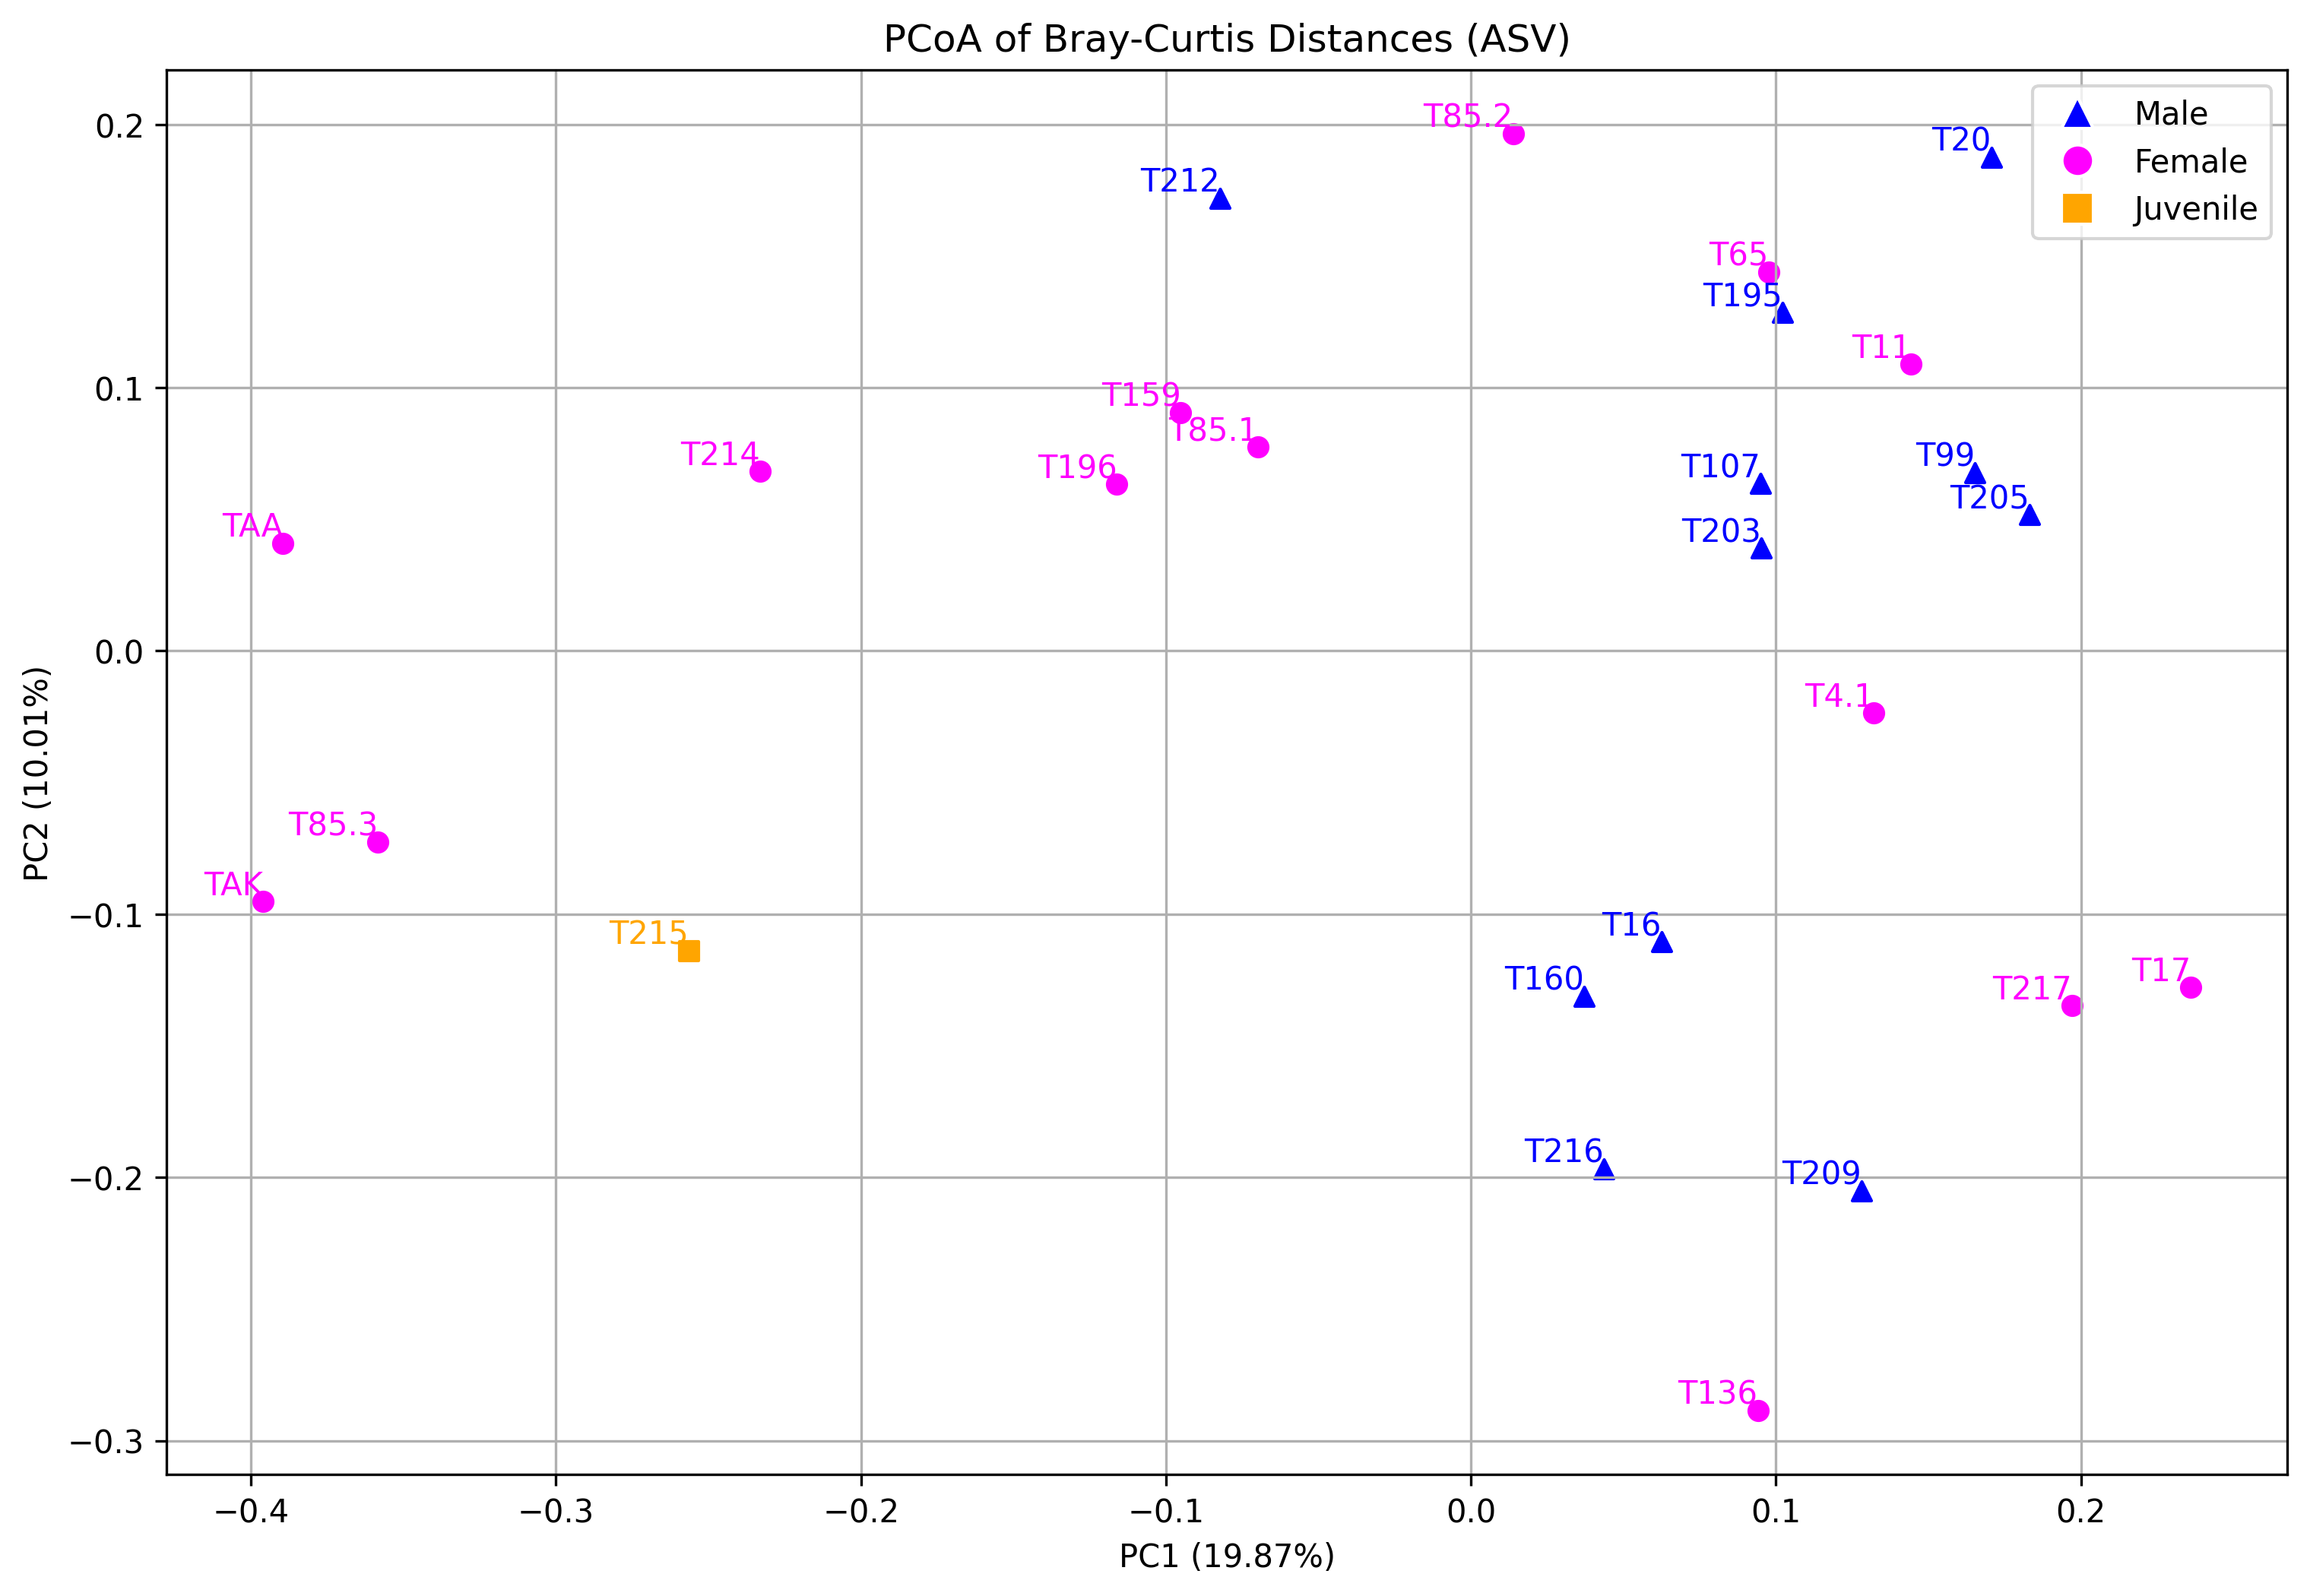

In [1]:
#visualization of PCoA data
import matplotlib.pyplot as plt
import numpy as np

# Provided sample data with PC1 and PC2 coordinates. These PC data came from an analysis performed by Zymo Research
samples = {
    'Site': ['T4.1', 'T136', 'TAA', 'T215', 'T212', 'T65', 'T195', 'T16', 'T85.2', 'T209',
             'T20', 'T85.1', 'T216', 'T17', 'T107', 'T11', 'T214', 'T203', 'T205', 'T85.3',
             'T196', 'T217', 'T160', 'T99', 'TAK', 'T159'],
    'PC1': [0.132106749, 0.09404186, -0.389497192, -0.256575123, -0.082341681, 0.097590776,
            0.102169137, 0.062445352, 0.01378371, 0.12794519, 0.170559476, -0.069767919,
            0.043556109, 0.236005444, 0.094771858, 0.144339019, -0.233144172, 0.095194372,
            0.183110815, -0.358289828, -0.116054987, 0.196996673, 0.036989475, 0.165249179,
            -0.396046009, -0.095138285],
    'PC2': [-0.023656197, -0.288623279, 0.040953498, -0.113811878, 0.172045703, 0.143986013,
            0.128535497, -0.11048377, 0.196425248, -0.205157323, 0.18755697, 0.077453388,
            -0.196798057, -0.127880975, 0.063551467, 0.108902169, 0.068326168, 0.039048842,
            0.051683046, -0.072648901, 0.063318336, -0.134669679, -0.13113694, 0.067803811,
            -0.095244776, 0.09052162]
}

# Manually input metadata with corrected assignments
manual_metadata = {
    'Site': ['T4.1', 'T136', 'TAA', 'T215', 'T212', 'T65', 'T195', 'T16', 'T85.2', 'T209',
             'T20', 'T85.1', 'T216', 'T17', 'T107', 'T11', 'T214', 'T203', 'T205', 'T85.3',
             'T196', 'T217', 'T160', 'T99', 'TAK', 'T159'],
    'Sex': ['F', 'F', 'F', 'Juv.', 'M', 'F', 'M', 'M', 'F', 'M',
            'M', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'M', 'F',
            'F', 'F', 'M', 'M', 'F', 'F']
}

# Map 'Sex' to colors and markers
color_map = {'M': 'blue', 'F': 'magenta', 'Juv.': 'orange'}
marker_map = {'M': '^', 'F': 'o', 'Juv.': 's'}
colors = [color_map[sex] for sex in manual_metadata['Sex']]
markers = [marker_map[sex] for sex in manual_metadata['Sex']]

# Convert to numpy arrays for easier manipulation
samples_pc1 = np.array(samples['PC1'])
samples_pc2 = np.array(samples['PC2'])

# Proportion of variance explained by PC1 and PC2
pc1_variance = 19.87  # Replace with actual variance percentage for PC1
pc2_variance = 10.01  # Replace with actual variance percentage for PC2

# Plotting the PCoA with increased DPI
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

# Plot samples as points with different markers for males, females, and juveniles
for i in range(len(samples_pc1)):
    ax.scatter(samples_pc1[i], samples_pc2[i], color=colors[i], marker=markers[i], label=f'{samples["Site"][i]} ({manual_metadata["Sex"][i]})')

# Annotate samples
for i, txt in enumerate(samples['Site']):
    ax.text(samples_pc1[i], samples_pc2[i], txt, color=colors[i], ha='right', va='bottom')

ax.set_xlabel(f'PC1 ({pc1_variance}%)')
ax.set_ylabel(f'PC2 ({pc2_variance}%)')
ax.set_title('PCoA of Bray-Curtis Distances (ASV)')
ax.grid(True)

# Create a legend for male, female, and juvenile
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='^', color='w', label='Male', markersize=10, markerfacecolor='blue'),
                   Line2D([0], [0], marker='o', color='w', label='Female', markersize=10, markerfacecolor='magenta'),
                   Line2D([0], [0], marker='s', color='w', label='Juvenile', markersize=10, markerfacecolor='orange')]
ax.legend(handles=legend_elements, loc='upper right')

# Display the plot
plt.show()
